# Background of the dataset

***Data Set Link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci***

**Problem we are trying to solve**

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**Content**

There are 13 attributes

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- and the label
- condition: 0 = no disease, 1 = disease

# Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline 
#Makes the plot outputs appear and be stored in the notebook so we won't use plt.show() everytime

sns.set_style("whitegrid")
# The style parameter controls properties such as the color of the background and whether a grid is enabled by default

In [4]:
data_df = pd.read_csv('heart.csv')
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
# Categorical data i.e condition
# Using value_counts()
data_df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

# EDA (Exploratory Data Analysis)
Analyzing and investigating the data set and summarizing its main characteristics
Here, we are trying to understand data in a better way by looking for following answers:
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
data_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
265,50,0,3,110,254,0,2,159,0,0.0,0,0,0,0
12,59,1,0,134,204,0,0,162,0,0.8,0,2,0,1
169,66,1,3,160,228,0,2,138,0,2.3,0,0,1,0
25,70,1,1,156,245,0,2,143,0,0.0,0,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0,0


# Handling missing values

In [6]:
# creating a figure object
# Necessary for tweaking the size of the figure and for adding multiple Axes objects in a single figure.
plt.figure(figsize = (10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Plotly - Used for interactive graphs, specifically when you want to create dashboards
Plotly's main object -> Figure() object
- Libraries used:
  - import plotly.graph_objects as go
  - import plotly.express as px
  - import plotly.figure_factory as ff


In [7]:
import missingno as msno # Used for checking null values

<AxesSubplot: >

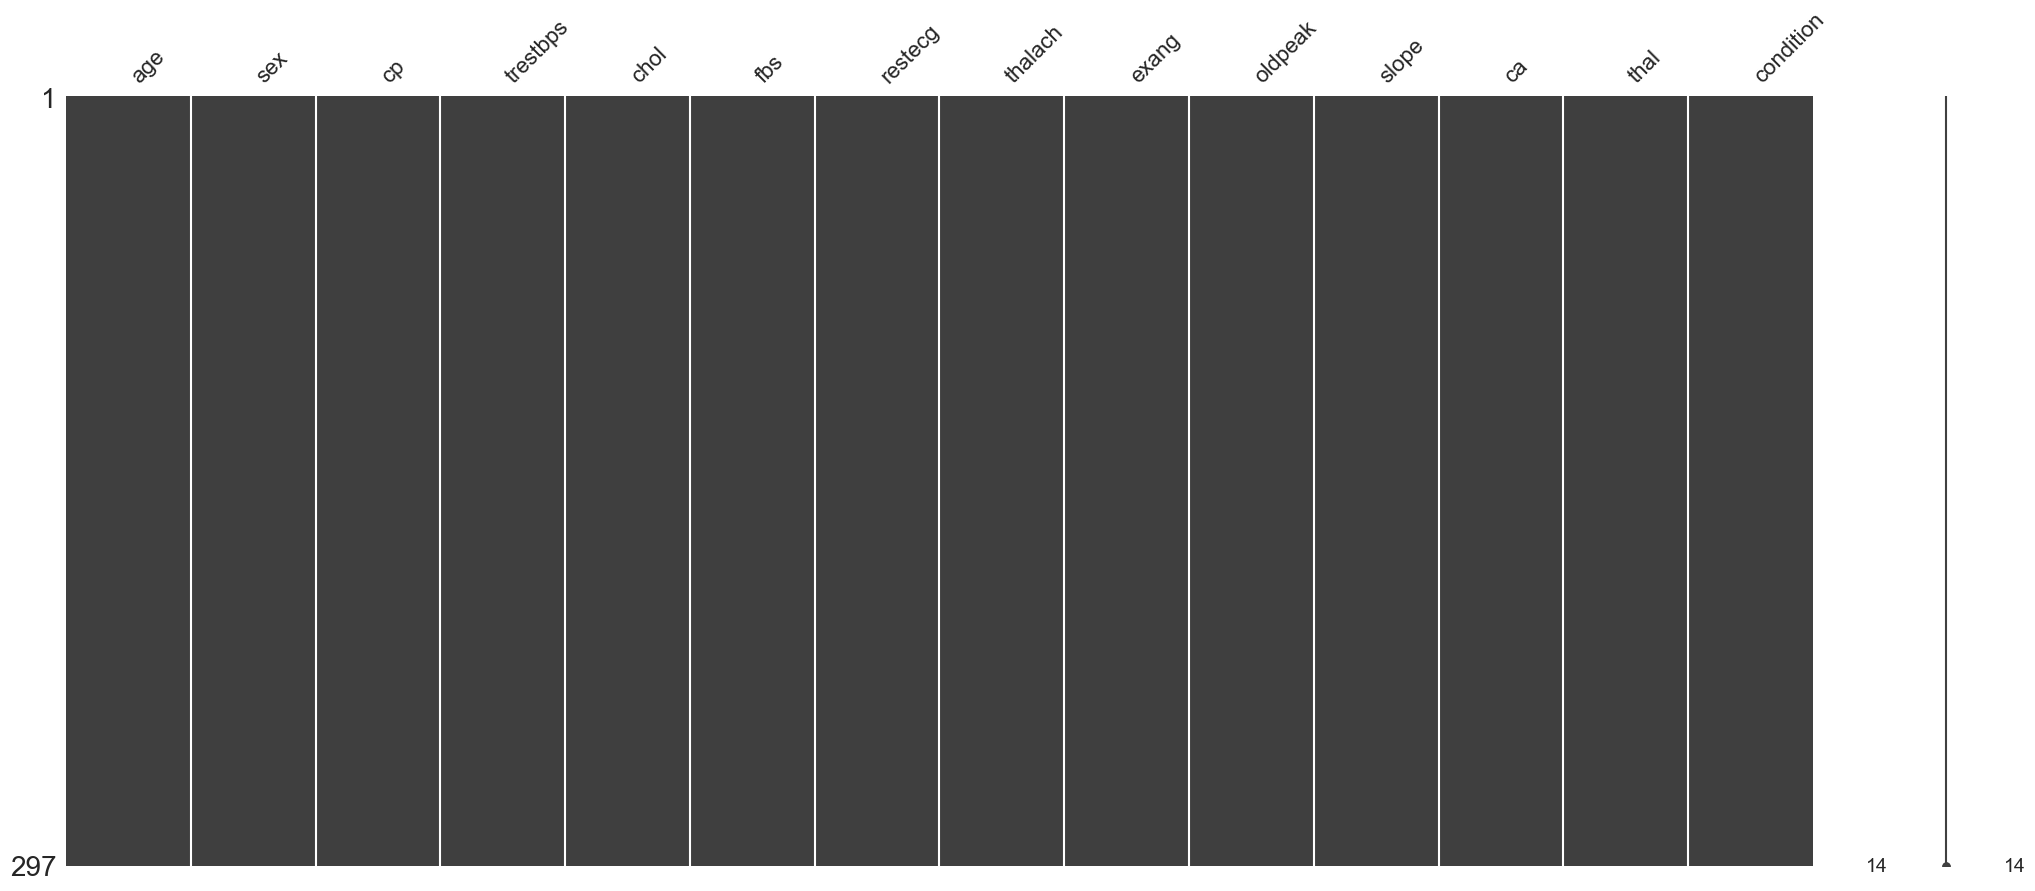

In [8]:
msno.matrix(data_df)
# Shows there are no missing values since all the columns ziko aligned- like hakuna yenye iko higher kuliko ingine

In [9]:
# We can also use this to check for missing values
data_df.info()
# Shows all columns are non-null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
# You can also use this
data_df.isnull().sum()
# Shows the sum of the number of all the null values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

# BarPlots
## Seaborn: Countplot, Barplot + value_count() 

### Countplot
Shows the count of observations in each categorical bin using bars

**Tips:**
- If you want it vertical, replace x with y
- Use alpha parameter to set opacity for a more readable plot
- Use hue to find features trend
- Use plt.xticks or plt.yticks to rotate x-axis label 

In [12]:
df = pd.melt(data_df) # unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set.
df




,variable,value
0,age,69.0
1,age,69.0
2,age,66.0
3,age,65.0
4,age,64.0
...,...,...
4153,condition,1.0
4154,condition,1.0
4155,condition,1.0
4156,condition,0.0


<AxesSubplot: xlabel='condition', ylabel='count'>

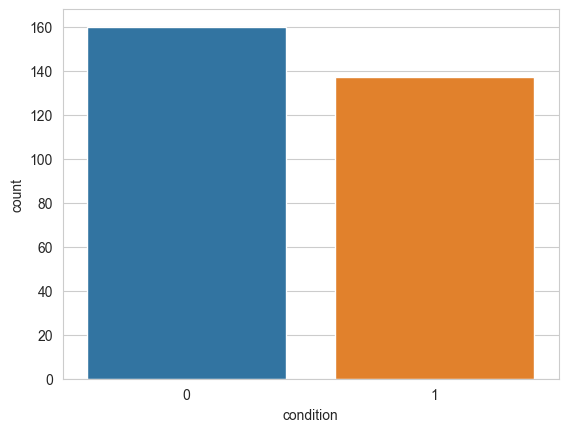

In [88]:
# Plotting the frequency of the condition values in the dataset, i.e people who have and don't have diseases.
# condition: 0 = no disease, 1 = disease
# This tells us that in our dataset we have more number of people who don't have heart disease.
sns.countplot(x=data_df['condition'])

### Matplotlib

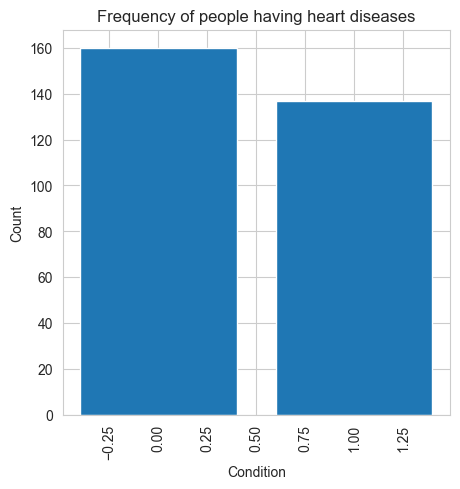

In [13]:
# Using matplotlib to plot the same values above
# Not very recommended - use countlib instead
plt.figure(figsize = (5, 5))
counts = data_df['condition'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 90)
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title('Frequency of people having heart diseases')
plt.show()

#### Finding relation between condition value and other categorical values e.g. sex

##### Relationship between condition and sex

**sex**
- 1: male
- 0: female

**condition** 
- 0 = no disease
- 1 = disease

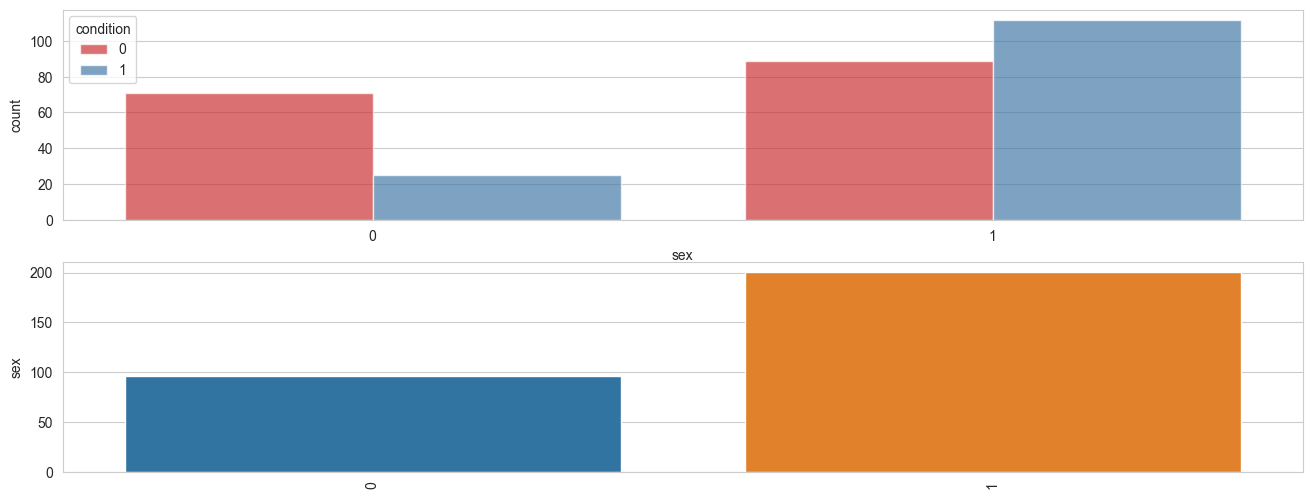

In [14]:
fig, ax = plt.subplots(2, 1, figsize = (16,6))

# Type 1 : Use hue parameter -> splits the bar into 2 based on the condition
sns.countplot(x = data_df['sex'], hue = data_df['condition'], palette= 'Set1', alpha = 0.7, ax = ax[0] )
#plt.legend()
plt.xticks(rotation = 'vertical')



# From the results, males are more likely to get heart diseases than females

# Type 2: use value counts + barplots / hard to divide like hue
sns.barplot(x = data_df['sex'].value_counts().index, y = data_df['sex'].value_counts(), ax = ax[1])
plt.show()


**Conclusion:**
    Males are more likely to get heart diseases than females

##### Relationship between condition and cp

**cp: chest pain type**
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

**condition** 
- 0 = no disease
- 1 = disease

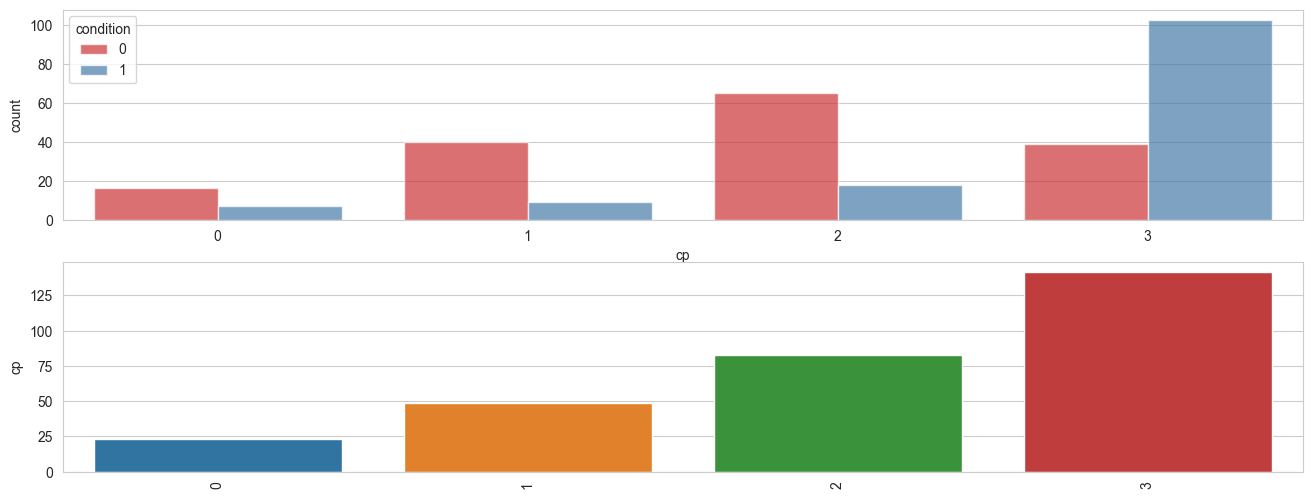

In [15]:
fig, ax = plt.subplots(2, 1, figsize = (16,6))

# Type 1 : Use hue parameter -> splits the bar into 2 based on the condition
sns.countplot(x = data_df['cp'], hue = data_df['condition'], palette= 'Set1', alpha = 0.7, ax = ax[0] )
#plt.legend()
plt.xticks(rotation = 'vertical')

# From the results, people with asymptomatic chest pain type are more likely to get heart diseases than the ones with the other type

# Type 2: use value counts + barplots / hard to divide like hue
sns.barplot(x = data_df['cp'].value_counts().index, y = data_df['cp'].value_counts(), ax = ax[1])
plt.show()

**Conclusions**
-  People with asymptomatic chest pain type are the most likely to get heart diseases
-  People with Typical angina chest pain type are the least likely to get heart diseases

##### Relationship between ca (number of major blood vessels) and condition

**ca: number of major vessels**
   - 0-3 colored by flourosopy
   
**condition** 
- 0 = no disease
- 1 = disease

<AxesSubplot: ylabel='cp'>

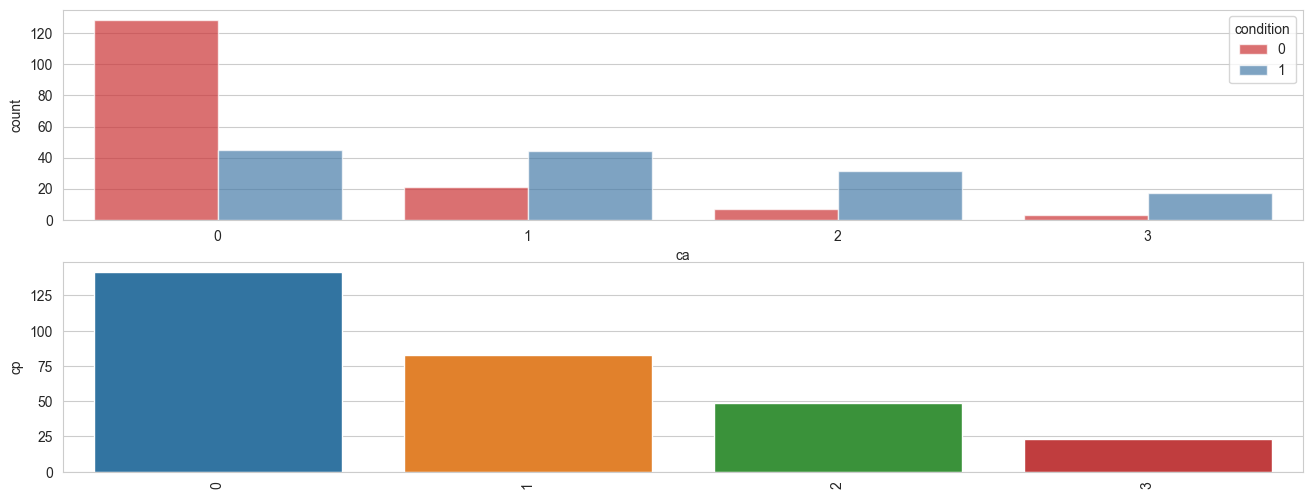

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (16,6))

# Type 1 : Use hue parameter -> splits the bar into 2 based on the condition
sns.countplot(x = data_df['ca'], hue = data_df['condition'], palette= 'Set1', alpha = 0.7, ax = ax[0] )
#plt.legend()
plt.xticks(rotation = 'vertical')

# Type 2: use value counts + barplots / hard to divide like hue
sns.barplot(x = data_df['ca'].value_counts().index, y = data_df['cp'].value_counts(), ax = ax[1])

**Conclusion**
- People with 0 major blood vessels are the most likely to have heart disease

**Slope: the slope of the peak exercise ST segment**
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping

**condition** 
- 0 = no disease
- 1 = disease

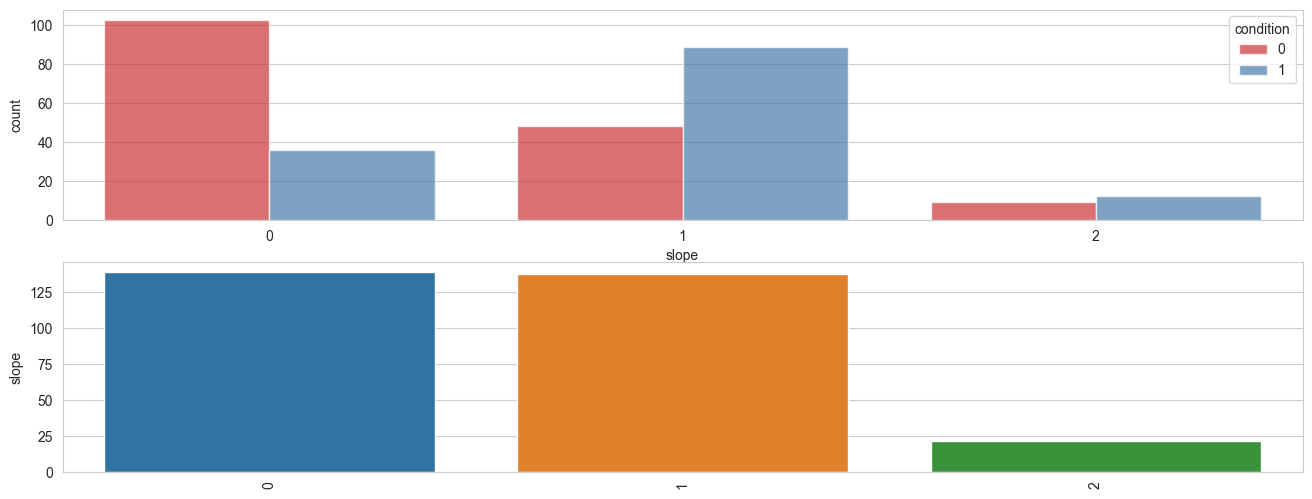

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (16, 6))

sns.countplot(x = data_df['slope'], hue = data_df['condition'], ax= ax[0], palette = "Set1", alpha = 0.7)
plt.xticks(rotation = 'vertical')

sns.barplot(x = data_df['slope'].value_counts().index, y = data_df['slope'].value_counts(), ax = ax[1])
plt.show()

**Conclusion:** If the slope of the peak exercise ST segment is 1 - is flat, there is a higher possibility to have a heart disease

###### Relationship between fbs(fasting blood sugar) and condition

**fbs: (fasting blood sugar > 120 mg/dl)** 
   - 1 = true
   - 0 = false
    
**condition** 
- 0 = no disease
- 1 = disease

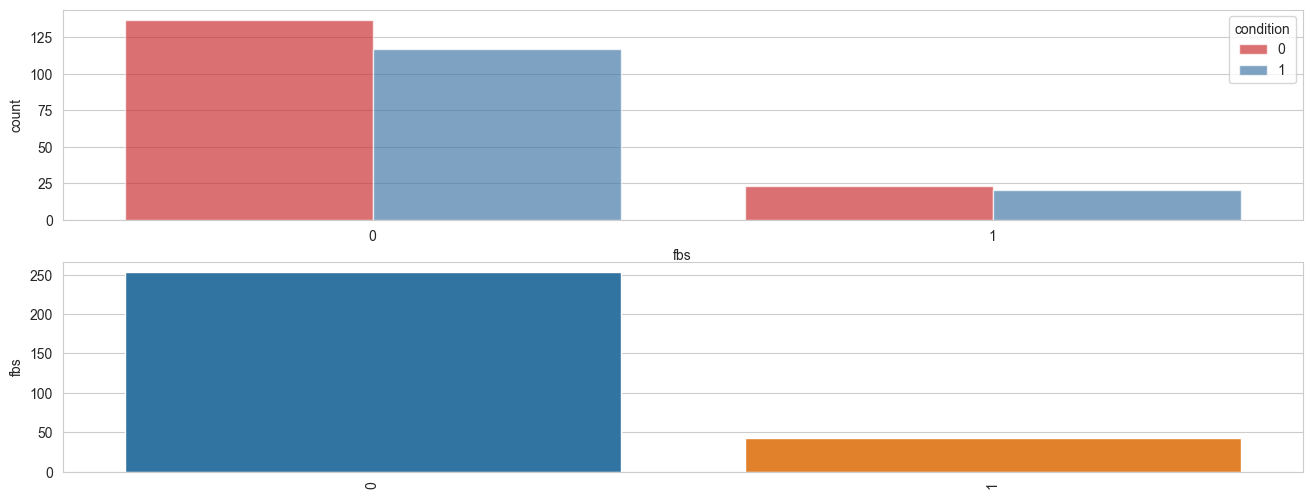

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (16, 6))

sns.countplot(x = data_df['fbs'], hue = data_df['condition'], palette = "Set1", ax = ax[0], alpha = 0.7)
plt.xticks(rotation = 'vertical')
sns.barplot(x = data_df['fbs'].value_counts().index, y = data_df['fbs'].value_counts(), ax = ax[1])
plt.show()



**Conclusion:** No clear-cut idea

**restecg: resting electrocardiographic results**
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**condition** 
- 0 = no disease
- 1 = disease

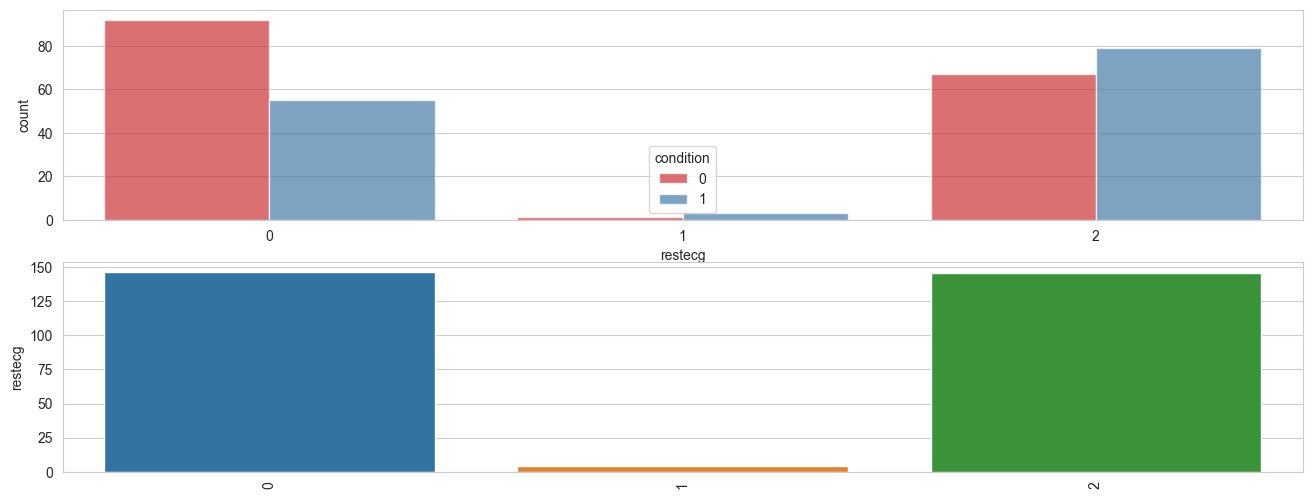

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (16, 6))

sns.countplot(x = data_df['restecg'], hue = data_df['condition'], ax = ax[0], palette = 'Set1', alpha = 0.7)
plt.xticks(rotation ='vertical')

sns.barplot(x = data_df['restecg'].value_counts().index, y = data_df['restecg'].value_counts(), ax = ax[1])
plt.show()

**Conclusion:** People with resting electrocardiographic results Value of 0(normal) are least likely to get heart disease 

##### Relationship between exang (exercise induced angina) and condition

**exang: exercise induced angina** 
  - 1 = yes
  - 0 = no
  
**condition** 
- 0 = no disease
- 1 = disease

<AxesSubplot: ylabel='exang'>

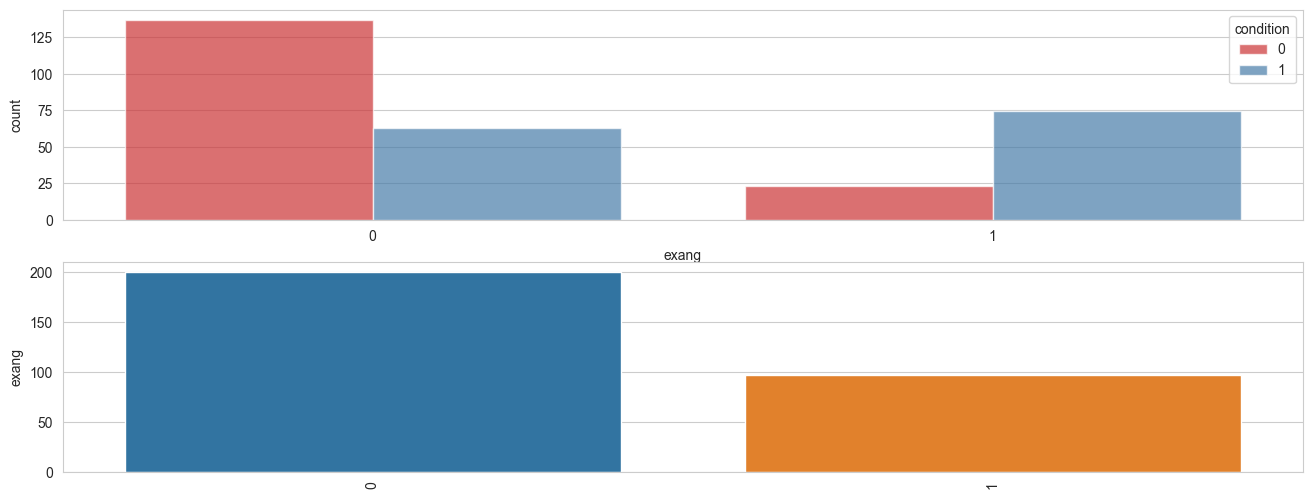

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (16, 6))

sns.countplot(x = data_df['exang'], hue = data_df['condition'], ax = ax[0], palette = 'Set1', alpha = 0.7)
plt.xticks(rotation = 'vertical')
sns.barplot(x = data_df['exang'].value_counts().index, y = data_df['exang'].value_counts(), ax= ax[1] )

**Conclusion:** People who have exercise-induced angina are more likely to have heart diseases than people who don't

##### Relationship between thal (thalium stress result) and condition

**thal**
- 0 = normal
- 1 = fixed defect
- 2 = reversable defect

**condition** 
- 0 = no disease
- 1 = disease

<AxesSubplot: ylabel='thal'>

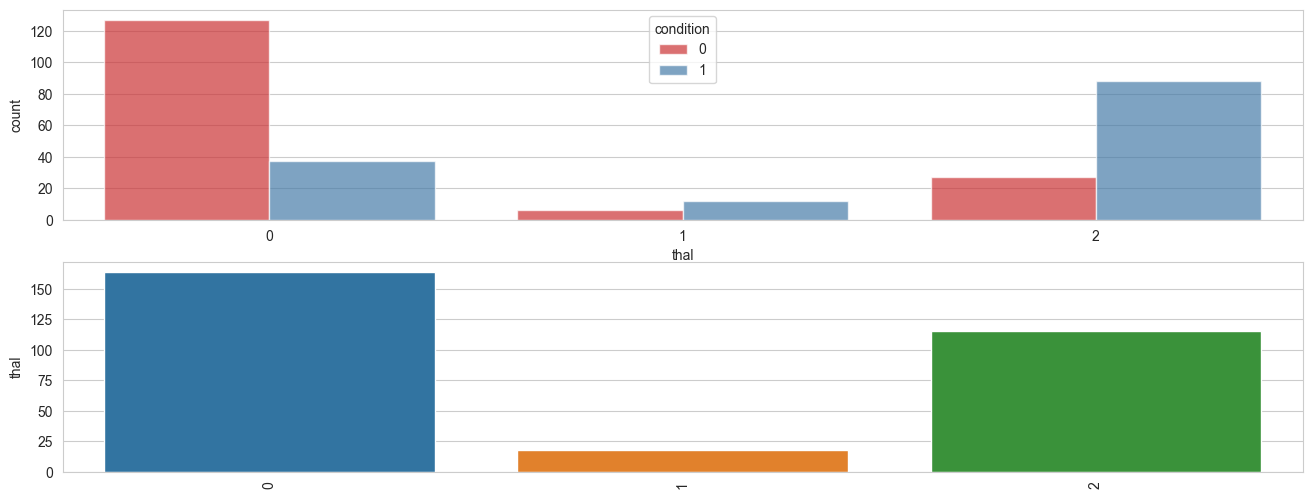

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (16, 6))

sns.countplot(x = data_df['thal'], hue = data_df['condition'], ax = ax[0], alpha = 0.7, palette = "Set1")
plt.xticks(rotation = 'vertical')

sns.barplot(x = data_df['thal'].value_counts().index, y = data_df['thal'].value_counts(), ax = ax[1])

**Conclusion:** People with normal thal value (0) are least prone to heart disease

# Histogram
Understanding distribution of continuous variables

## Matplotlib

Text(0.5, 1.0, 'Age distribution')

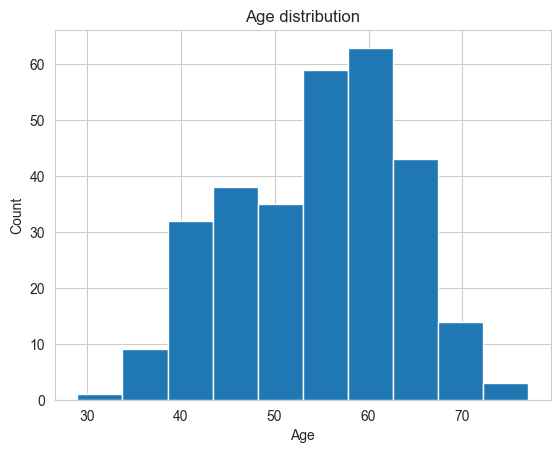

In [24]:
plt.hist(data_df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

## Seaborn: displot

- Documentation: https://seaborn.pydata.org/generated/seaborn.displot.html
- displot: flexibly plot a univariable distribution of observations
- similar to countplot because countplot is a histogram according to frequency
- Easier to see trends than countplot

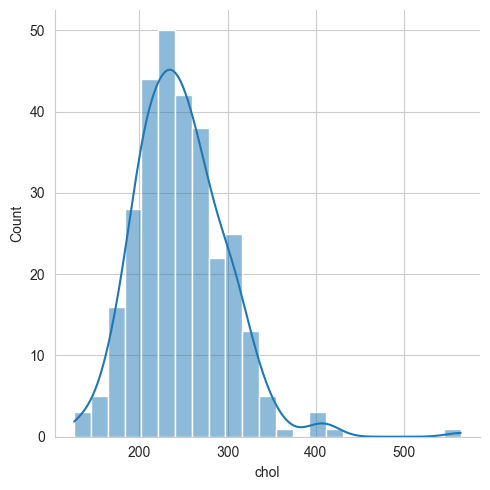

In [39]:
sns.displot(data_df['chol'], kde = True, height = 5)
plt.show()

## Seaborn: hisplot

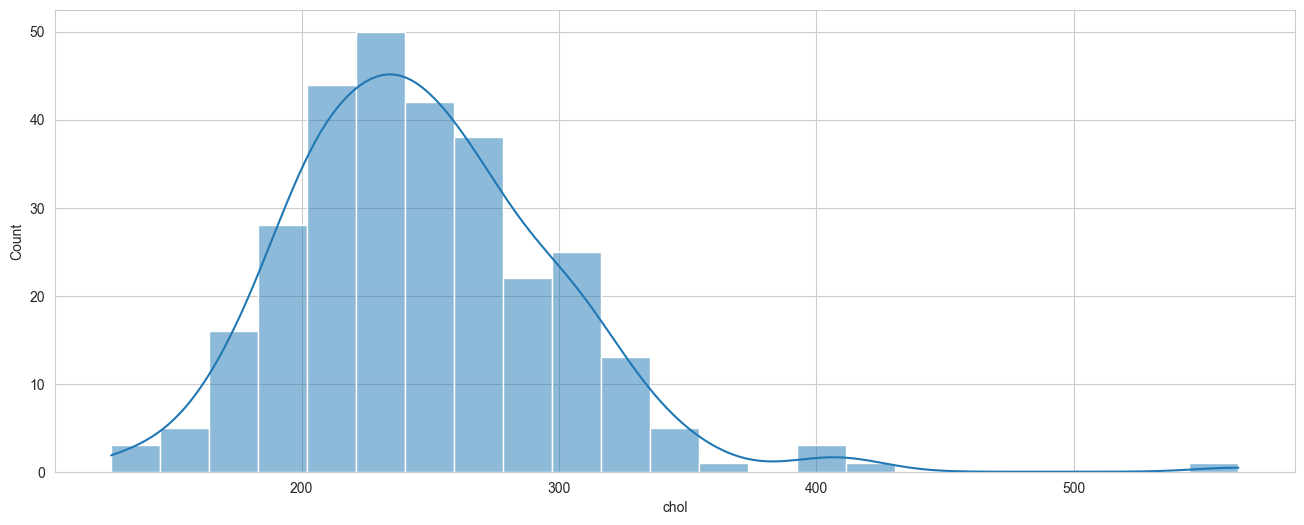

In [76]:
#  OR
fig, ax =plt.subplots(1, 1, figsize = (16, 6))

sns.histplot(data_df['chol'], kde= True, ax = ax)
plt.show()

#### Plotting histogram only, not kde parameters 
kde - Kernel density estimates-takes each individual sample value and draws a small gaussian bell curve over it. 

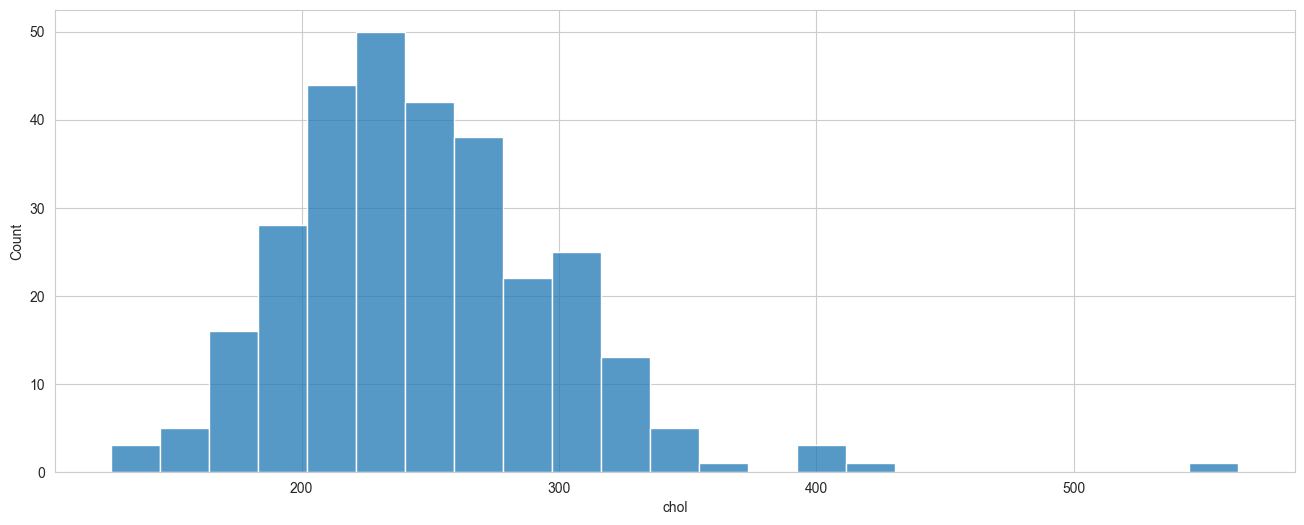

In [68]:
fig, ax =plt.subplots(1, 1, figsize = (16, 6))
sns.histplot(data_df['chol'],kde = False, ax = ax)
plt.show()

## Kdeplot

#### Plotting kde only

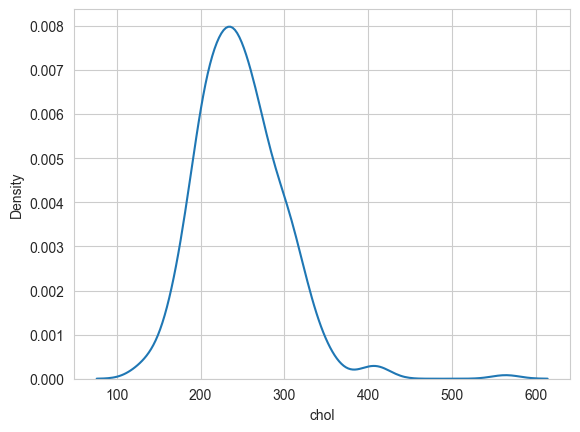

In [46]:
sns.kdeplot(data_df['chol'])
plt.show()

#### Drawing 2 graphs with labels

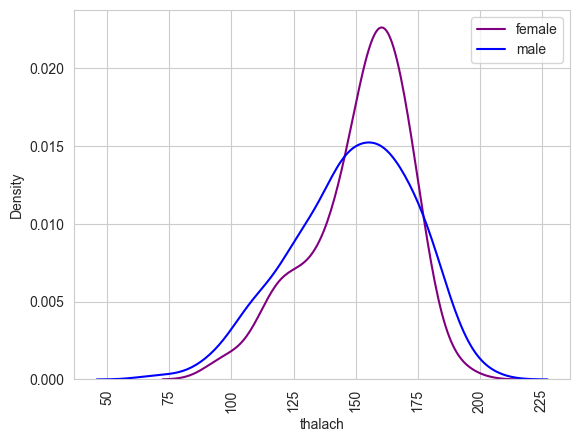

In [63]:
# thalach: maximum heart rate achieved
sns.kdeplot(data_df[data_df['sex']==0]['thalach'], color = 'purple',label = 'female')#maximum heart rate received of women
sns.kdeplot(data_df[data_df['sex']==1]['thalach'], color = 'blue', label = 'male') # Maximum heart rate of men
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

In [80]:
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
g = data_df.groupby('fbs')

sugar = g.get_group(1)
sugar

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
13,58,0,0,150,283,1,2,162,0,1.0,0,0,0,0
16,52,1,0,152,298,1,0,178,0,1.2,1,0,2,0
29,62,1,1,128,208,1,2,140,0,0.0,0,0,0,0
32,58,0,1,136,319,1,2,152,0,0.0,0,2,0,1
44,54,0,1,132,288,1,2,159,1,0.0,0,1,0,0
48,52,1,1,128,205,1,0,184,0,0.0,0,0,0,0
54,46,1,1,101,197,1,0,156,0,0.0,0,0,2,0


In [82]:
no_sugar = g.get_group(0)
no_sugar

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


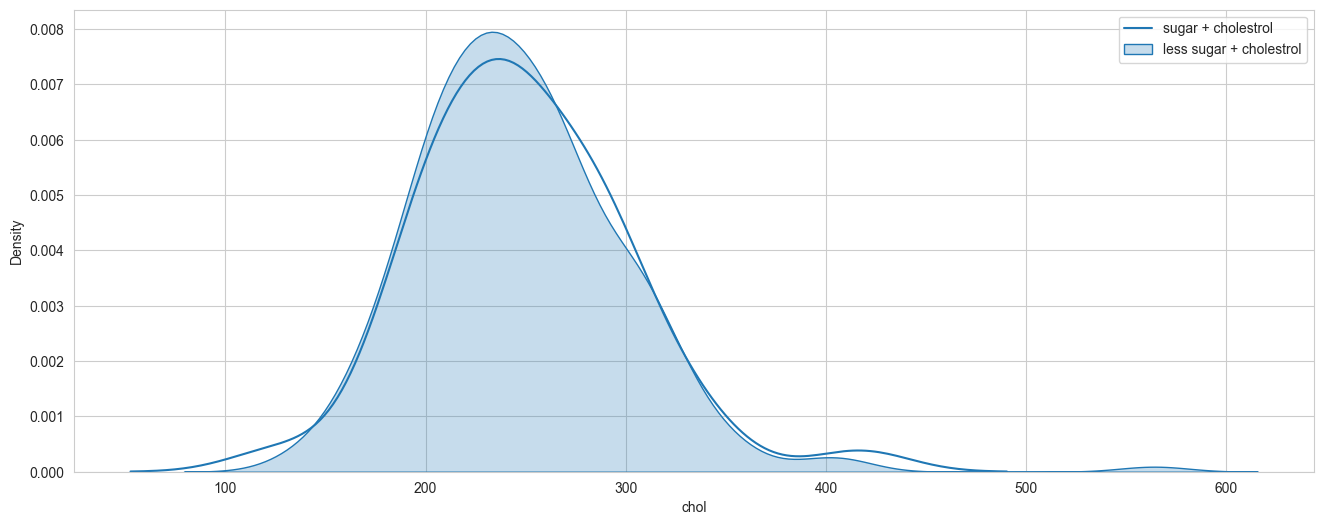

In [92]:
fig, ax = plt.subplots(1, 1, figsize= (16, 6))

sns.kdeplot(data = sugar['chol'], label = "sugar + cholestrol", ax = ax)
sns.kdeplot(data = no_sugar['chol'], label = "less sugar + cholestrol", ax = ax, fill = True)
plt.legend()
plt.show()

**Conclusion:** People with and without sugar show a somewhat similar pattern of cholestrol

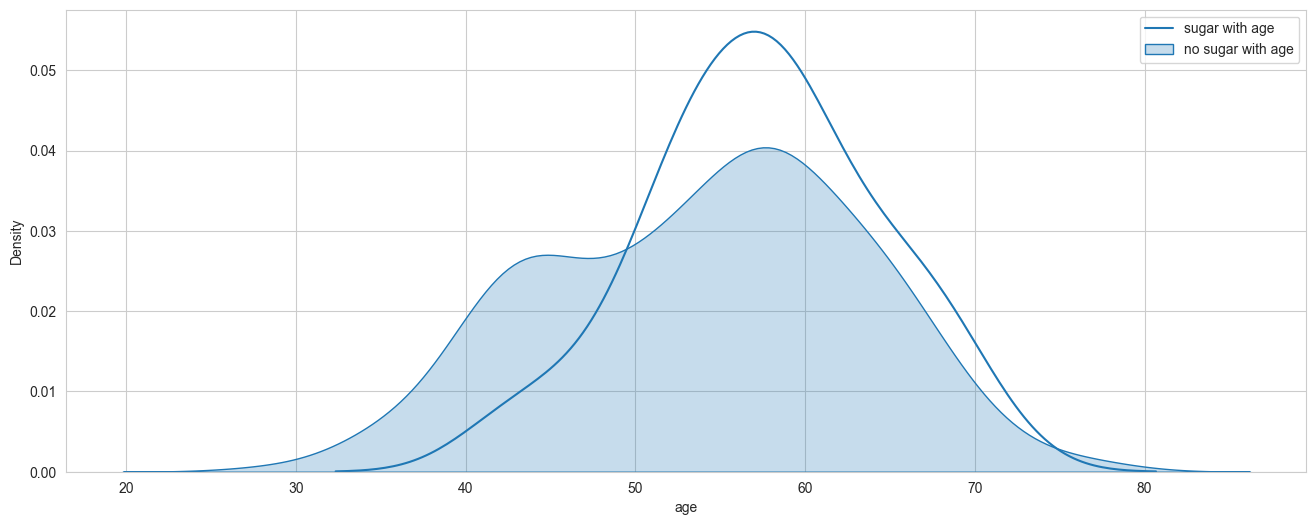

In [97]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

sns.kdeplot(data = sugar['age'], label = "sugar with age", ax = ax)
sns.kdeplot(data = no_sugar['age'], label = 'no sugar with age', ax = ax, fill = True)

plt.legend()
plt.show()

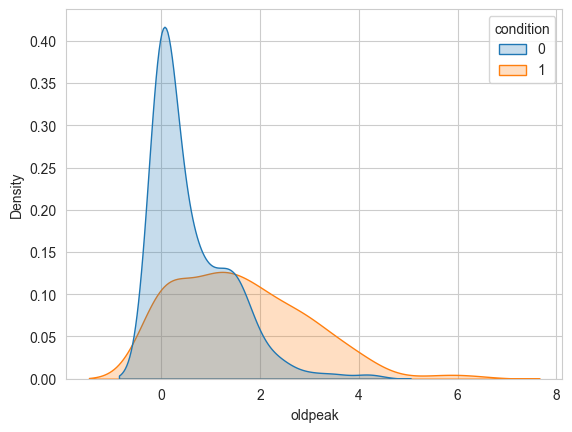

In [22]:
# oldpeak = ST depression induced by exercise relative to rest
sns.kdeplot(data = data_df, x = 'oldpeak', hue = 'condition', fill = True)
plt.show()

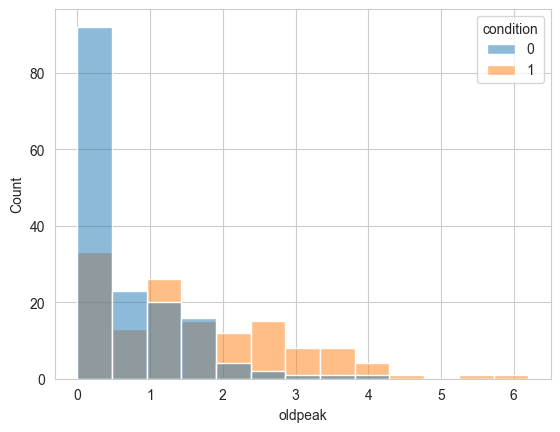

In [23]:
sns.histplot(data = data_df, x = 'oldpeak', hue = 'condition', fill = True)
plt.show()

**Conclusion:** There is a higher chance of having more than 120 ml of fasting blood sugar at age 55-60

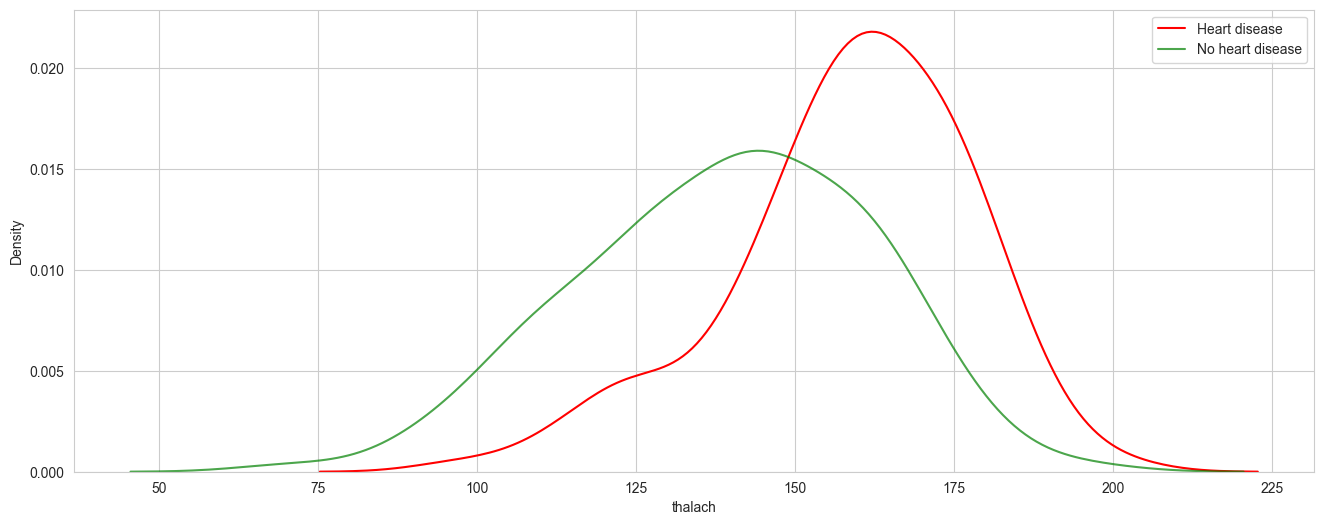

In [109]:
# Drawing 2 graphs with labels
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

sns.kdeplot(data_df[data_df['condition']==0]['thalach'], color = 'red', label = 'Heart disease')
sns.kdeplot(data_df[data_df['condition']==1]['thalach'], color = 'green', alpha = 0.7,label = 'No heart disease')

plt.legend()
plt.show()

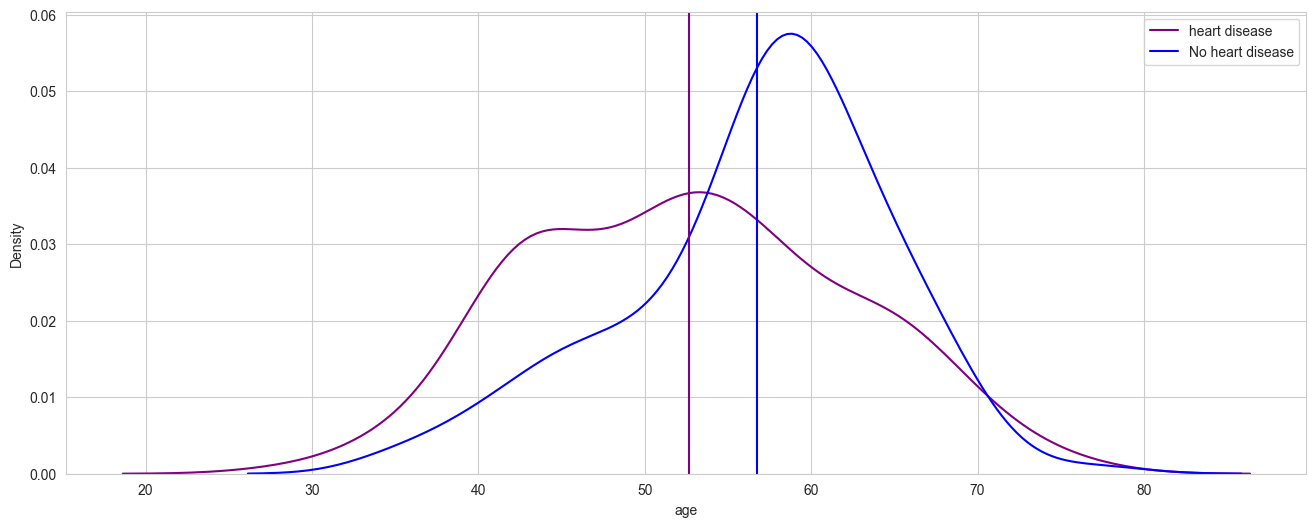

In [9]:
# Showing average

fig, ax = plt.subplots(1, 1, figsize = (16, 6))


sns.kdeplot(data_df[data_df['condition']==0]['age'], color = 'purple', ax =ax, label = 'heart disease')
sns.kdeplot(data_df[data_df['condition']==1]['age'], color = 'blue', ax = ax, label = 'No heart disease')

# Avg line
plt.axvline(data_df[data_df['condition']==0]['age'].mean(), color = 'purple')
plt.axvline(data_df[data_df['condition']==1]['age'].mean(), color ='blue')

plt.legend()
plt.show()

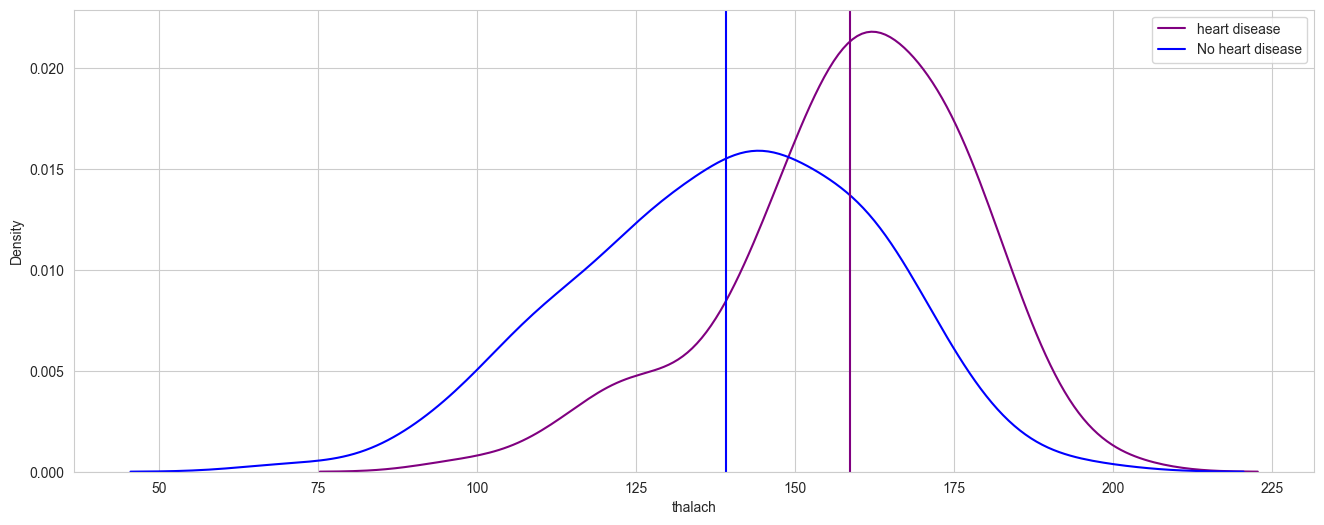

In [13]:
# Showing average

fig, ax = plt.subplots(1, 1, figsize = (16, 6))


sns.kdeplot(data_df[data_df['condition']==0]['thalach'], color = 'purple', ax =ax, label = 'heart disease')
sns.kdeplot(data_df[data_df['condition']==1]['thalach'], color = 'blue', ax = ax, label = 'No heart disease')

# Avg line
plt.axvline(data_df[data_df['condition']==0]['thalach'].mean(), color = 'purple')
plt.axvline(data_df[data_df['condition']==1]['thalach'].mean(), color ='blue')

plt.legend()
plt.show()

**Conclusion:** People with heart diseases also have a maximum thalach(heart rate)

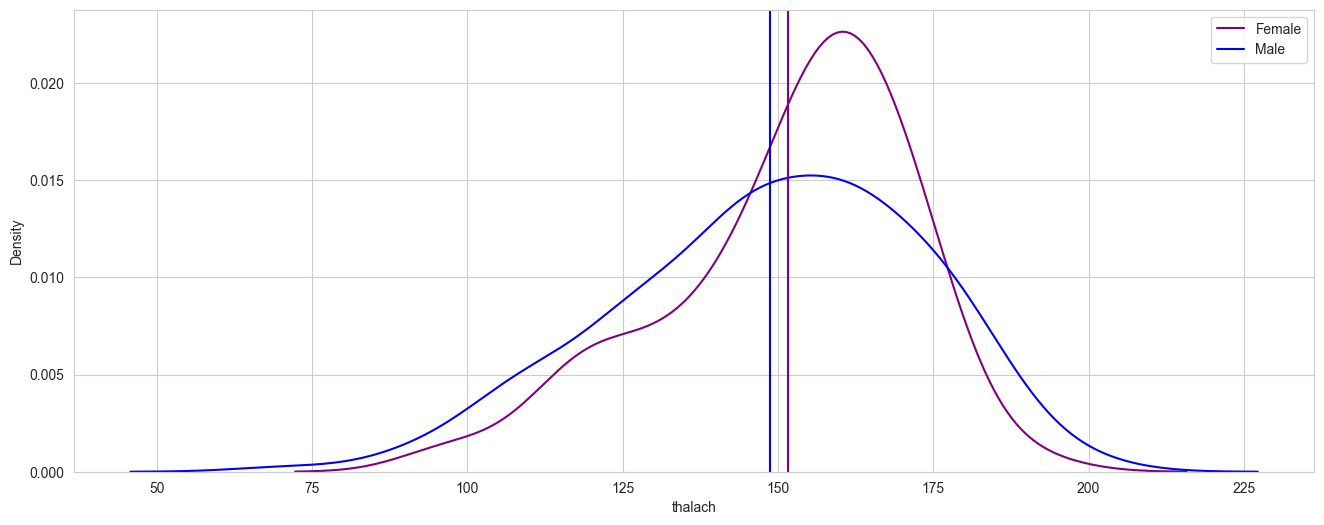

In [20]:
# Showing average

fig, ax = plt.subplots(1, 1, figsize = (16, 6))


sns.kdeplot(data_df[data_df['sex']==0]['thalach'], color = 'purple', ax =ax, label = 'Female')
sns.kdeplot(data_df[data_df['sex']==1]['thalach'], color = 'blue', ax = ax, label = 'Male')

# Avg line
plt.axvline(data_df[data_df['sex']==0]['thalach'].mean(), color = 'purple')
plt.axvline(data_df[data_df['sex']==1]['thalach'].mean(), color ='blue')

plt.legend()
plt.show()

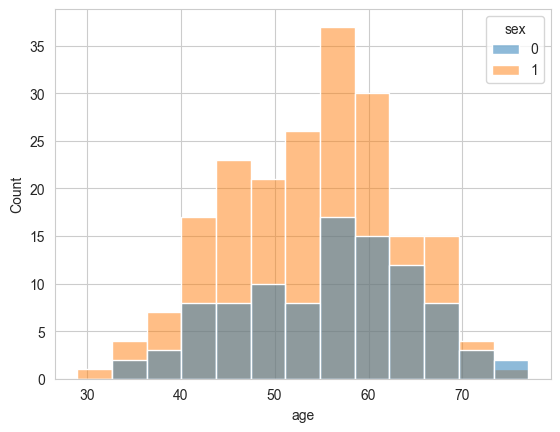

In [16]:
fig_ax = sns.histplot(data =data_df, x ='age', hue = 'sex')

**Conclusion:** People with ages 50-60 are more likely to have heart diseases because of stress levels

To use two variables, then we have to use displot

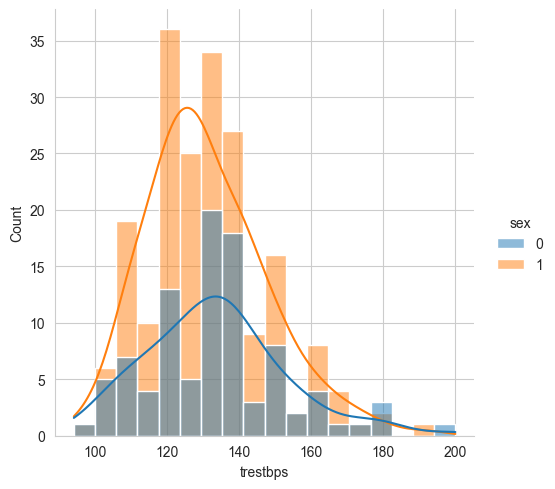

In [12]:
# trestbps = resting blood pressure
sns.displot(data = data_df, kde= True, x = 'trestbps', hue = 'sex')
plt.show()

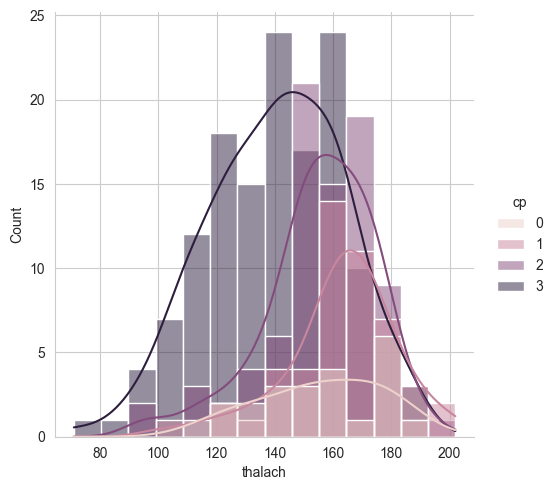

In [13]:
sns.displot(data = data_df, kde= True, x = 'thalach', hue = 'cp')
plt.show()

The above figure is very hard to interpret. Now, we'll have to split it into columns so it can be easier to interpret

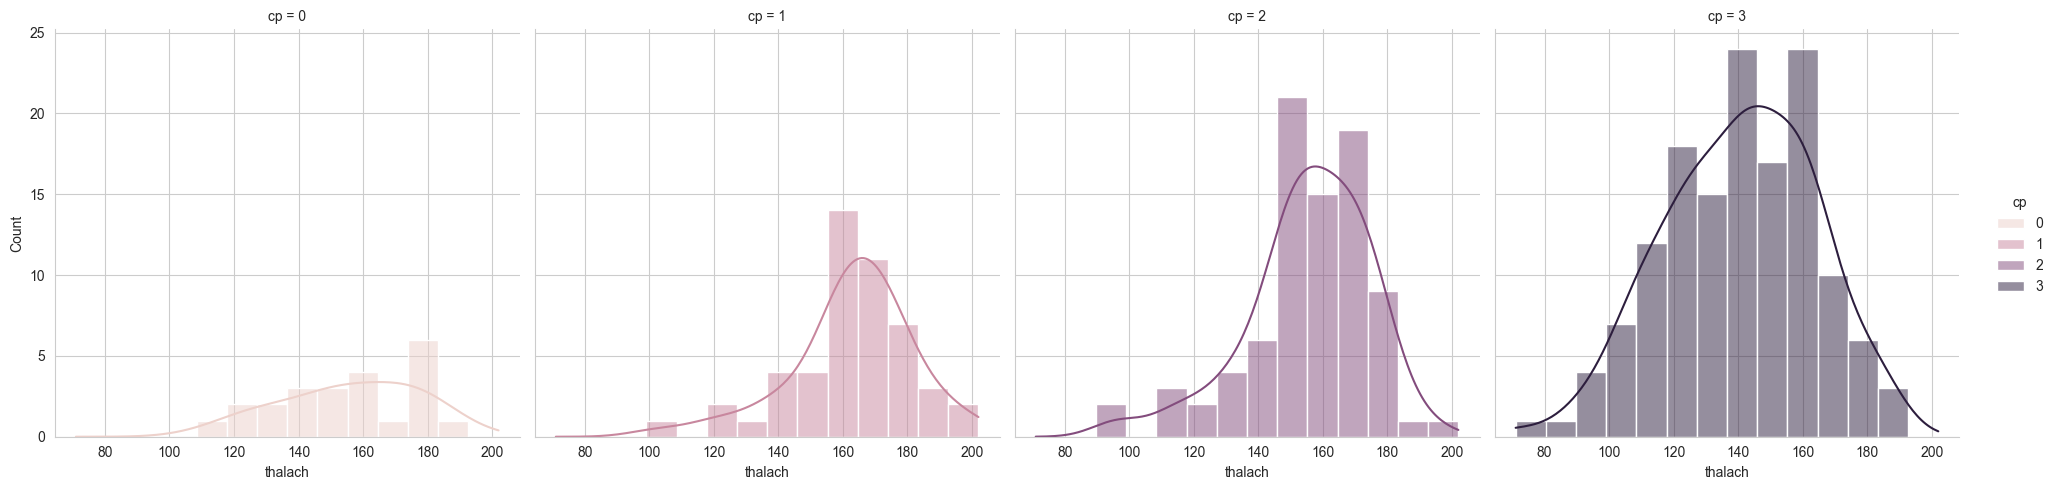

In [14]:
sns.displot(data = data_df, kde = True, x = 'thalach', hue = 'cp', col = 'cp')
plt.show()

cp: chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### Plotting heatmap between variables
 Generally used for correlations
 
 Tells us how dense two variables are


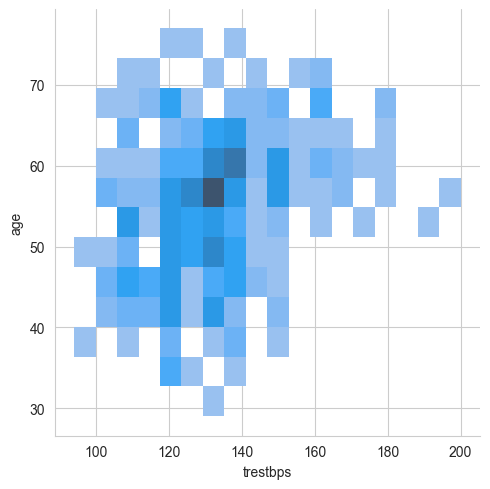

In [7]:
sns.displot(x = data_df['trestbps'], y = data_df['age'])
plt.show()

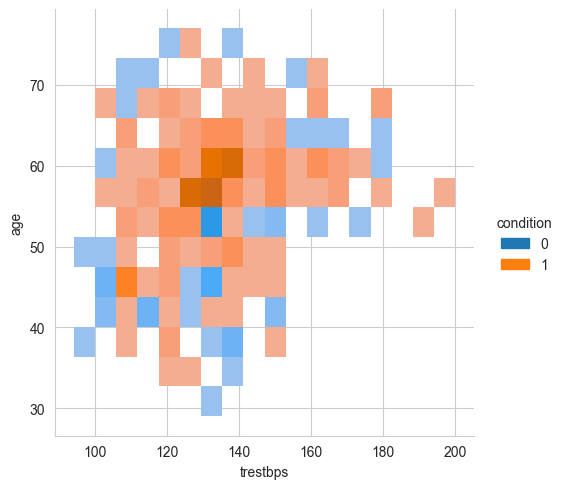

In [10]:
# Using hue to split the data
# Drawn in one graph - Not very efficient
sns.displot(data = data_df, x = 'trestbps', y = 'age', hue = 'condition')
plt.show()

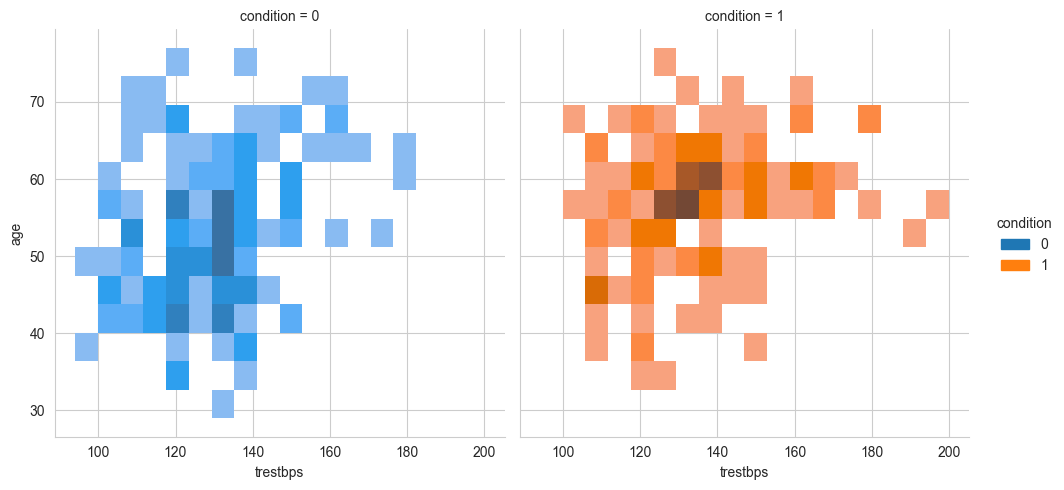

In [11]:
# Splitting the above into 2 separate graphs
sns.displot(data = data_df, x = 'trestbps', y = 'age', hue= 'condition', col = 'condition')
plt.show()


**Conclusion:** Even when the trestbps is high, it is not likely that the person has a heart disease...So trestbps isn't a deciding factor

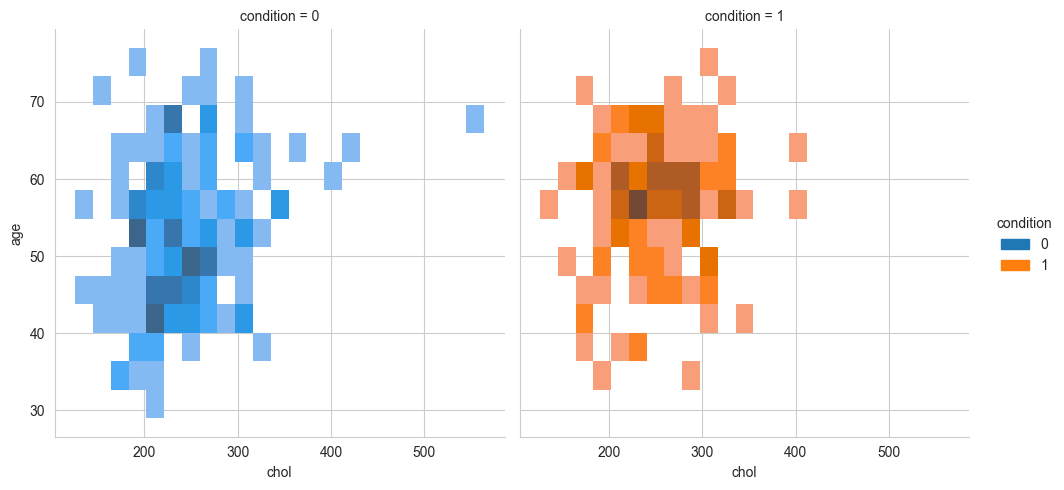

In [12]:
sns.displot(data = data_df, x = 'chol', y = 'age', hue = 'condition', col= 'condition')
plt.show()

**Conclusions:** 
- A person whose cholestrol level is approx 220 and age around 55 -60 is more likely to have a heart disease
- People from age range 45-60 are highly likely to have heart diseases
- If a person has high cholestrol levels, they are most likely to have heart disease
 

## Scatter plots
- Important for linear regression tasks

### Matplotlib

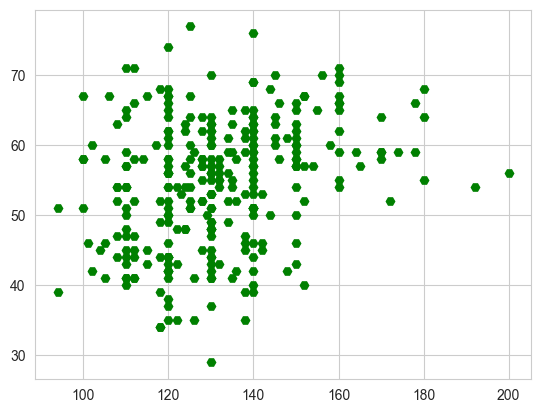

In [34]:
plt.plot(data_df['trestbps'], data_df['age'], linestyle = 'none', marker = 'H', color = 'g')
plt.show()

### Seaborn: Scatteplot
- Used where there is a possibility of many semantic groupings

#### Parameters
- hue - Color change per category
- style - marker (*, +, ^, o, H)
- size - point size


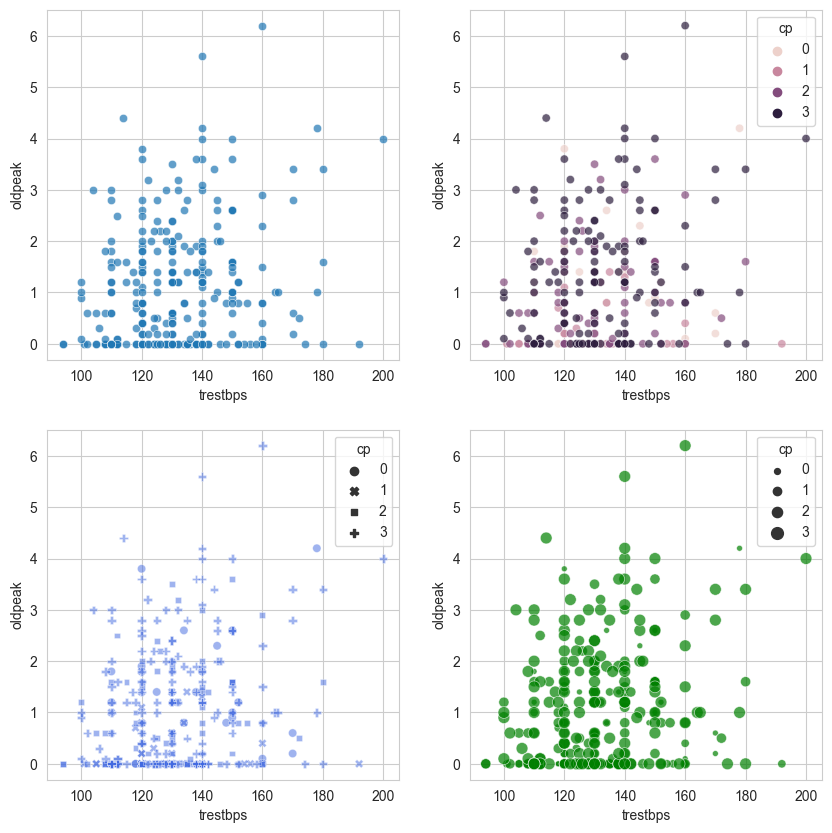

In [52]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))

# Type 1: default scatter plot

sns.scatterplot(data= data_df, x = 'trestbps', y= 'oldpeak', alpha =0.7, ax = ax[0][0])


# Type 2: with hue
sns.scatterplot(data= data_df, x = 'trestbps', y= 'oldpeak', alpha =0.7, hue = 'cp', ax = ax[0][1])

# Type 3 - with style and color
sns.scatterplot(data= data_df, x = 'trestbps', y= 'oldpeak', alpha =0.5, style = 'cp', color = 'royalblue', ax = ax[1][0])

# Type 3 - with size and color
sns.scatterplot(data= data_df, x = 'trestbps', y= 'oldpeak', alpha =0.7, size = 'cp', color = 'green', ax = ax[1][1])

plt.show()

**NB:** Having diffrent patterns helps us interpret the graph better

**Using two hue values**
- condition: 
   - 0 = blue =   No disease 
   - 1 = orange = disease
- sex
   - 0 = o =  Female
   - 1 = x =  Male

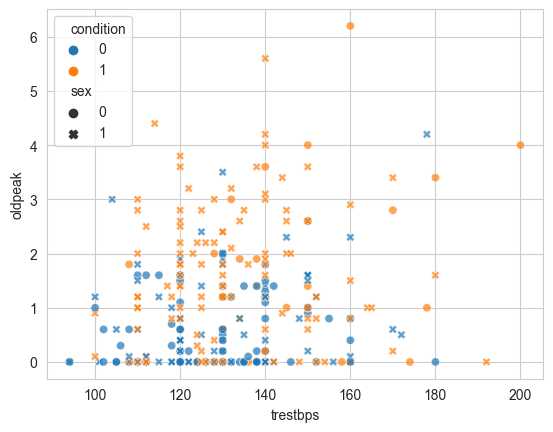

In [55]:
# Use the style attribute
sns.scatterplot(data = data_df, x = 'trestbps', y = 'oldpeak', style = 'sex', hue = 'condition', color ='royalblue', alpha = 0.7)
plt.show()

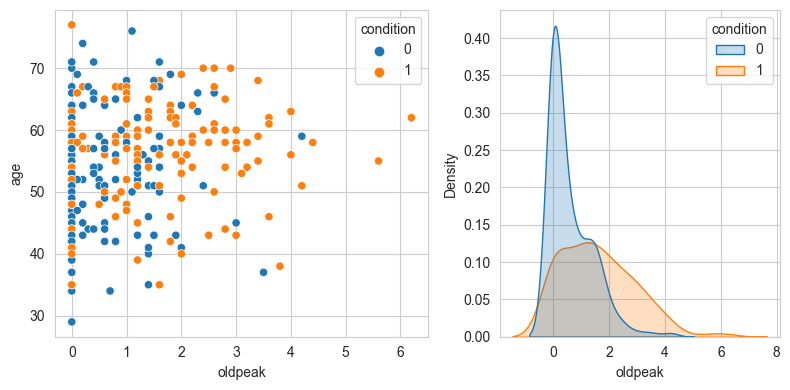

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios= [4, 3]))

sns.scatterplot(data= data_df, x = 'oldpeak', y = 'age', hue = 'condition', ax = ax[0])
sns.kdeplot(data = data_df,x = 'oldpeak', hue = 'condition', fill = True, ax = ax[1]) #kde normally doesn't have y variable

fig.tight_layout()

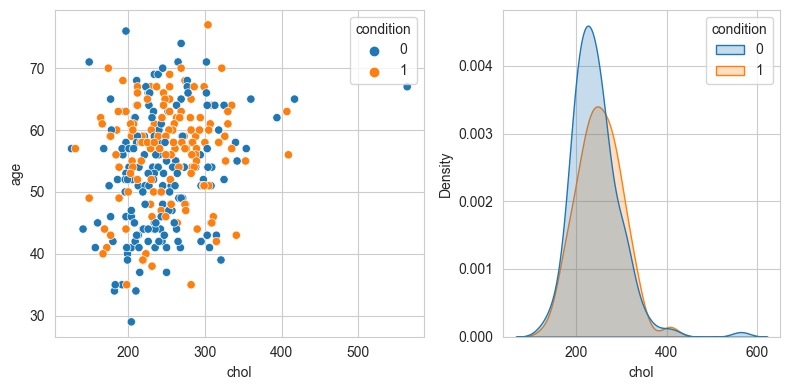

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios= [4, 3]))

sns.scatterplot(data= data_df, x = 'chol', y = 'age', hue = 'condition', ax = ax[0])
sns.kdeplot(data = data_df,x = 'chol', hue = 'condition', fill = True, ax = ax[1]) #kde normally doesn't have y variable

fig.tight_layout()

## Box Plot
- Used to identify outliers
- Visualize continuous variable distributions

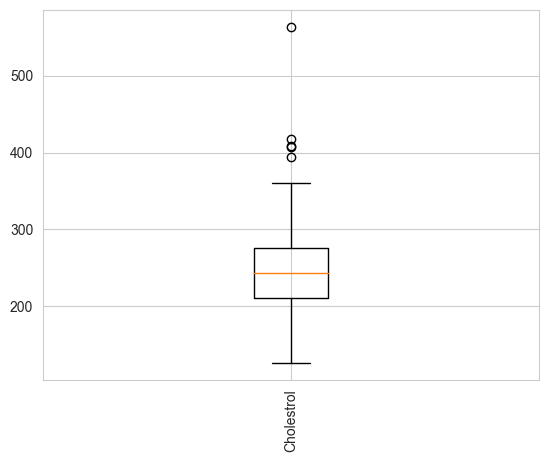

In [71]:
fig, ax = plt.subplots()
ax.boxplot(data_df['chol']) # OR plt.boxplot()
plt.xticks([1], ['Cholestrol'], rotation = 'vertical')
plt.show()

The boxplot shows the median of the dataset(red line in the miidle), the inter-quartile ranges (the ends of the box) and the maximum and minimum values (The far end of the "whiskers")

## Seaborn: boxplot, swarmplot and stripplot
- boxplot - shows distributions with respect to categories
- swarmplot - draw a categorical scatterplot with non-overlapping points
- stripplot - draw a scatterplot where one variable is categorical

**Usually consists of max, min, median, 1Q, 3Q and 1.5 times IQR values. Data points less or more than 1.5 IQR are regarded as outliers**

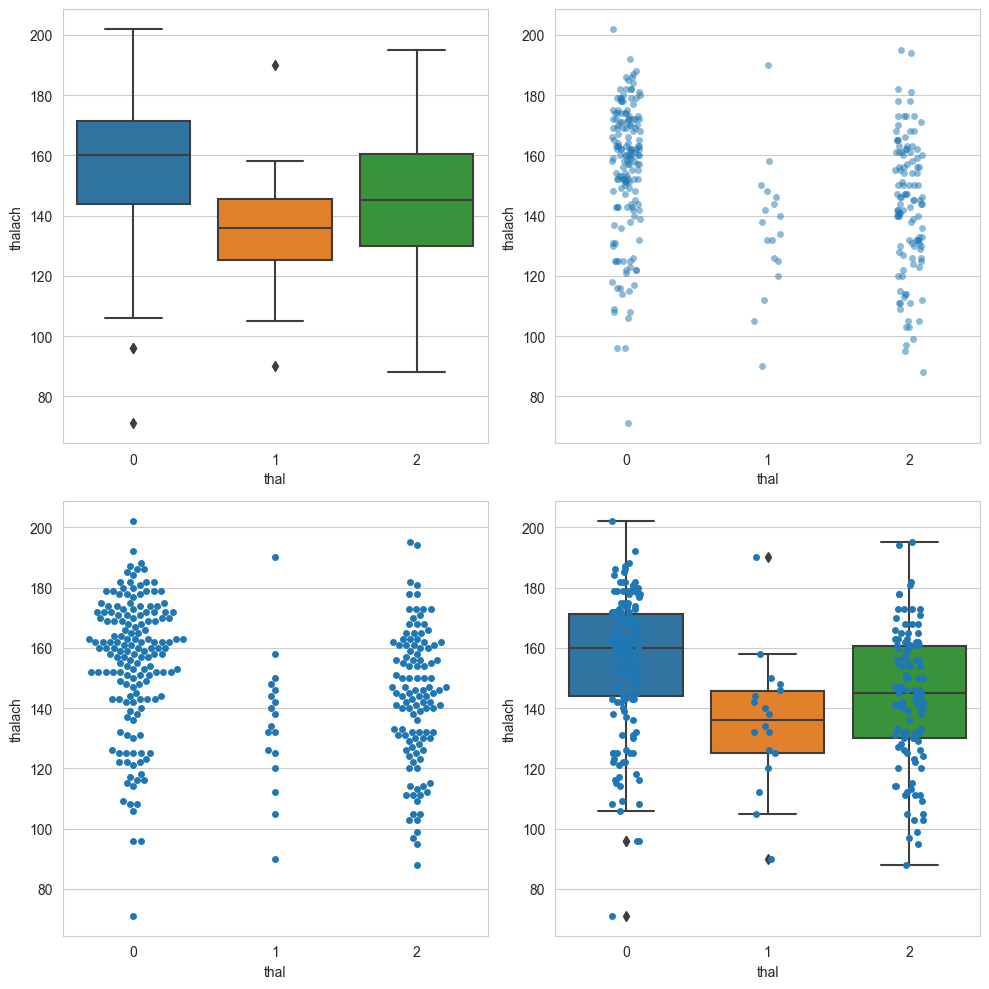

In [81]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

# Boxplot
sns.boxplot(data = data_df, x = 'thal',y = 'thalach', ax = ax[0][0])

#Stripplot
sns.stripplot(data = data_df, x = 'thal',y = 'thalach', ax = ax[0][1], alpha = 0.5)

# Swarm plot
sns.swarmplot(data = data_df, x = 'thal',y = 'thalach', ax = ax[1][0])

#Boxplot and stripplot
sns.boxplot(data = data_df, x = 'thal',y = 'thalach', ax = ax[1][1])
sns.stripplot(data = data_df, x = 'thal',y = 'thalach', ax = ax[1][1])

plt.tight_layout()
plt.show()

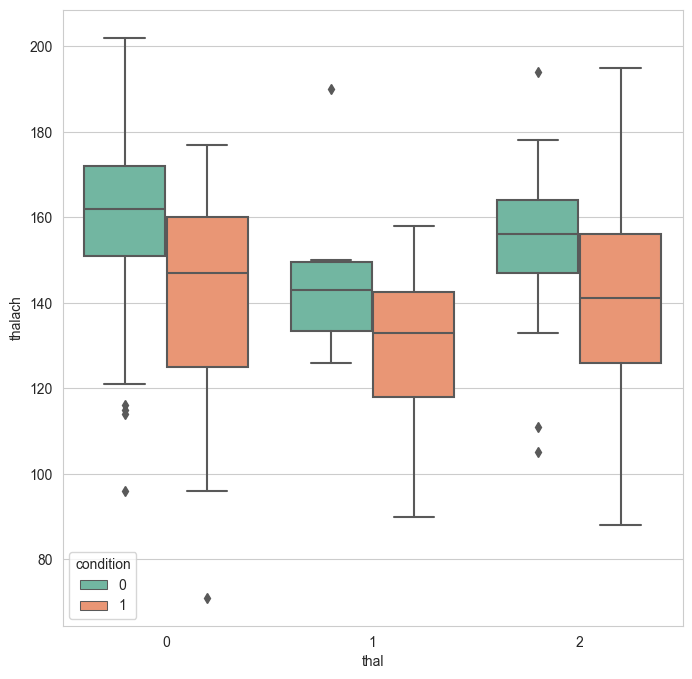

In [91]:
# Adding hue parameters to boxplot
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.boxplot(data = data_df, ax = ax, x = 'thal', y = 'thalach', palette = 'Set2', hue = 'condition')
plt.show()

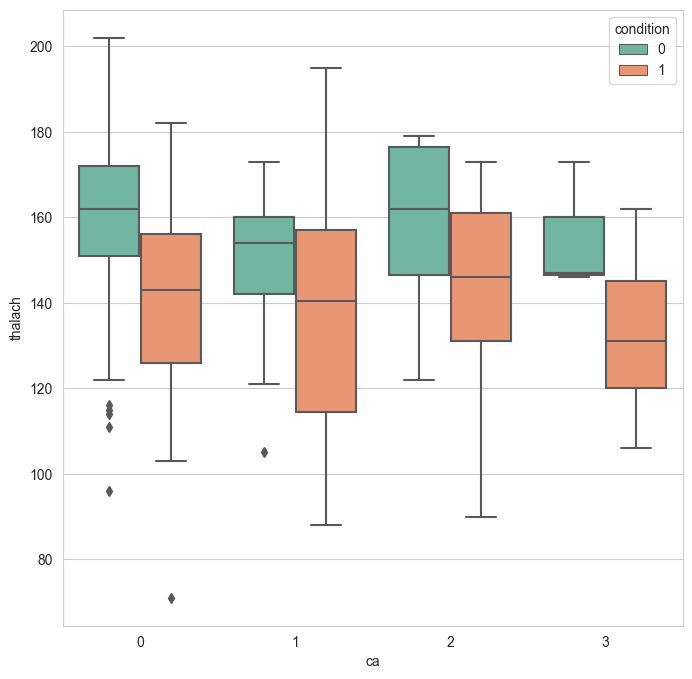

In [90]:
# Adding hue parameters to boxplot
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.boxplot(data = data_df, ax = ax, x = 'ca', y = 'thalach', palette = 'Set2', hue = 'condition')
plt.show()